In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
# Đọc file CSV
df = pd.read_csv("heart.csv")
# Loại bỏ các dòng có giá trị thiếu
df = df.dropna()
df.columns = [
    'age',
    'sex',
    'chest_pain_type',
    'resting_blood_pressure',
    'cholesterol',
    'fasting_blood_sugar',
    'rest_ecg',
    'max_heart_rate_achieved',
    'exercise_induced_angina',
    'st_depression',
    'st_slope',
    'num_major_vessels',
    'thalassemia',
    'target'
]
print("Trần Quân Bảo - 6351071005")
# Xem 5 dòng đầu tiên
print(df.head())

# Kiểm tra thông tin tổng quan
print(df.info())



Trần Quân Bảo - 6351071005
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.3         0                  0   
1                        0            3.5  

In [ ]:
correlation_matrix = df.corr(method='pearson')


Trần Quân Bảo - 6351071005


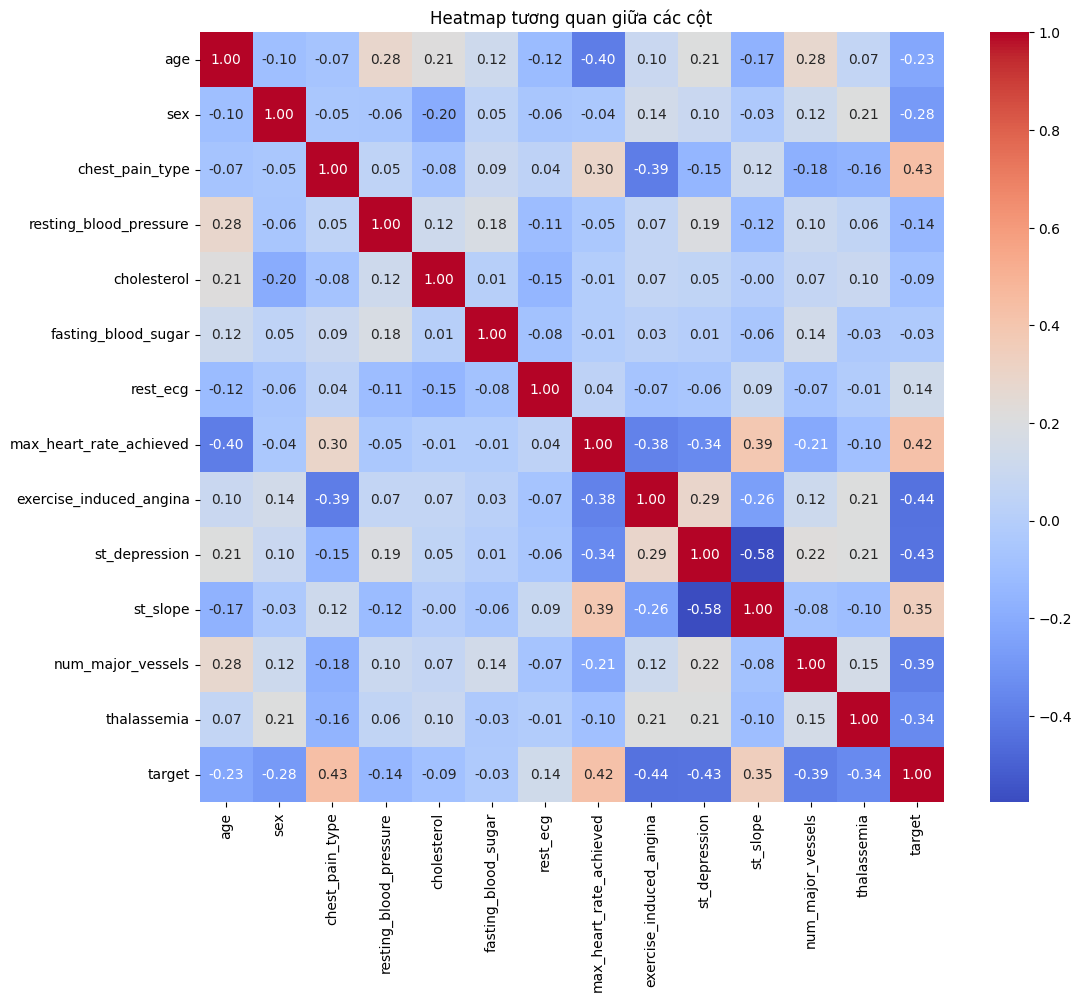

In [ ]:
print("Trần Quân Bảo - 6351071005")
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap tương quan giữa các cột")
plt.show()


In [ ]:
threshold = 0.8
# Tạo danh sách các cột cần loại bỏ
cols_to_drop = [column for column in correlation_matrix.columns
                if any(abs(correlation_matrix[column]) > threshold) and column != 'quality']


In [ ]:
df_reduced = df.drop(columns=cols_to_drop)
print("Các cột còn lại sau khi loại bỏ:", df_reduced.columns)


Các cột còn lại sau khi loại bỏ: Index([], dtype='object')


In [ ]:
target_column = "target"  # cột cần dự đoán
# Các thuộc tính bình thường (features)
X = df.drop(columns=[target_column])

# Thuộc tính quyết định (target)
y = df[target_column]


In [ ]:
print("Trần Quân Bảo - 6351071005")
print("Các cột thuộc tính bình thường (features):")
print(X.columns)

print("\nThuộc tính quyết định (target):")
print(y.name)


Trần Quân Bảo - 6351071005
Các cột thuộc tính bình thường (features):
Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

Thuộc tính quyết định (target):
target


In [ ]:
print("Trần Quân Bảo - 6351071005")
categorical_cols = X.select_dtypes(include=['object']).columns
print("Các cột không phải số:", list(categorical_cols))
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Kích thước X trước one-hot encoding:", X.shape)
print("Kích thước X sau one-hot encoding:", X_encoded.shape)

# Xem vài dòng đầu tiên
print(X_encoded.head())


Trần Quân Bảo - 6351071005
Các cột không phải số: []
Kích thước X trước one-hot encoding: (303, 13)
Kích thước X sau one-hot encoding: (303, 13)
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,   # 30% cho kiểm thử
    random_state=42  # để kết quả chia dữ liệu có thể tái lập
)
print("Trần Quân Bảo - 6351071005")
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_test.shape)


Trần Quân Bảo - 6351071005
Kích thước tập huấn luyện: (212, 13)
Kích thước tập kiểm thử: (91, 13)


Trần Quân Bảo - 6351071005


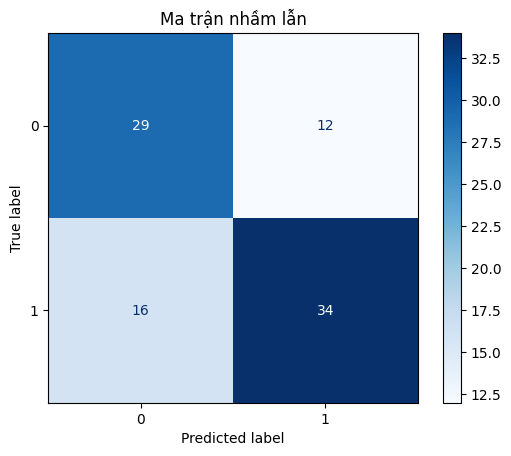

Độ chính xác trên tập kiểm thử: 0.6923


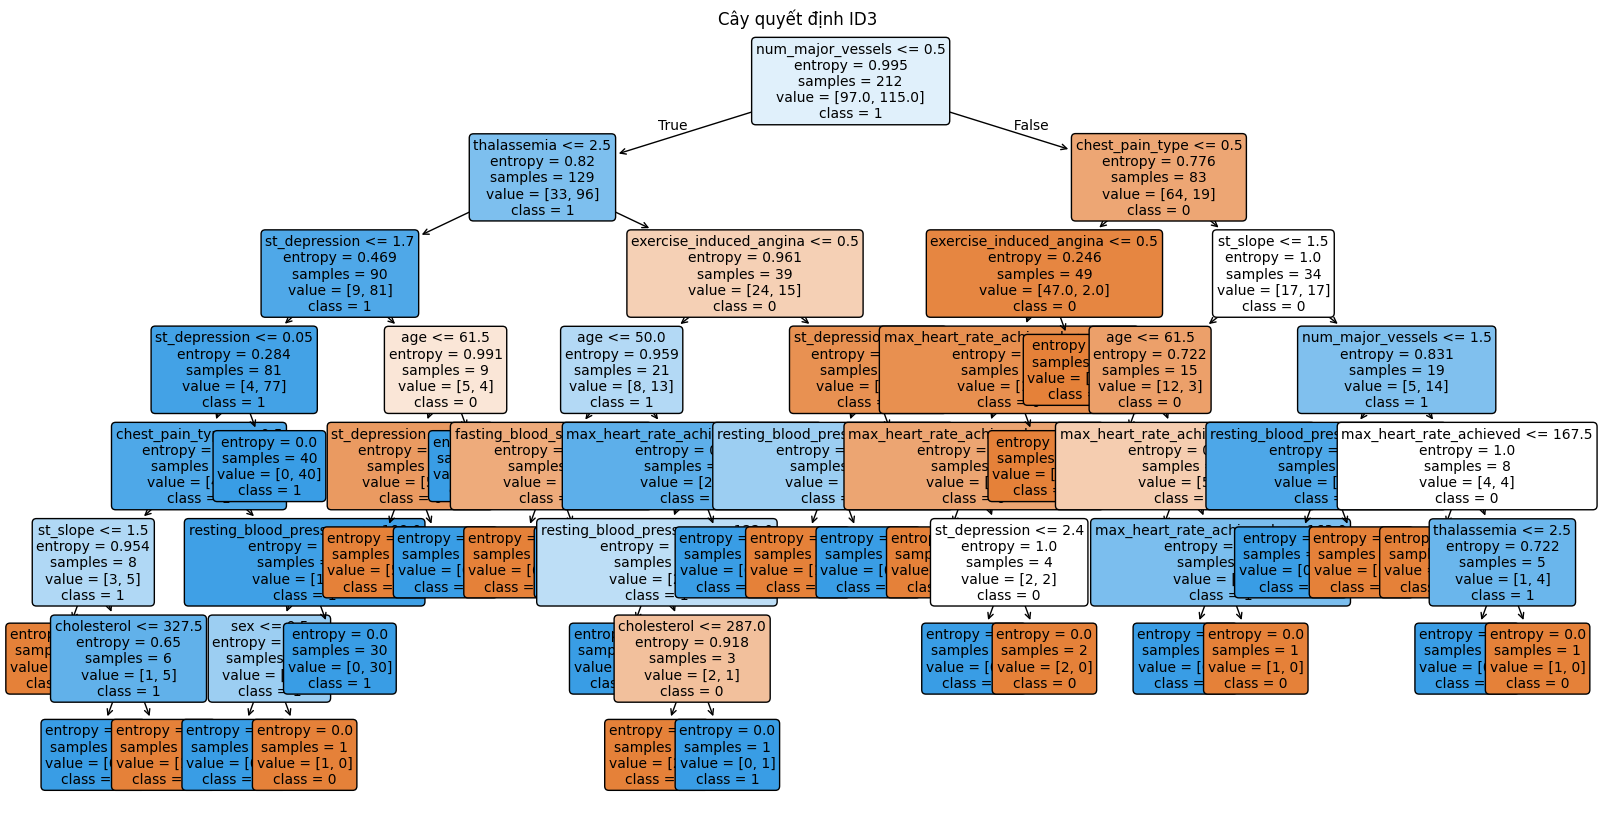

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Khởi tạo cây ID3
id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Huấn luyện trên tập dữ liệu huấn luyện
id3_tree.fit(X_train, y_train)
# Dự đoán trên tập kiểm thử
y_pred = id3_tree.predict(X_test)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Trần Quân Bảo - 6351071005")
# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=id3_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Ma trận nhầm lẫn")
plt.show()

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác trên tập kiểm thử:", round(accuracy, 4))
plt.figure(figsize=(20,10))
plot_tree(
    id3_tree,
    feature_names=X_encoded.columns,
    class_names=[str(cls) for cls in id3_tree.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Cây quyết định ID3")
plt.show()


Trần Quân Bảo - 6351071005


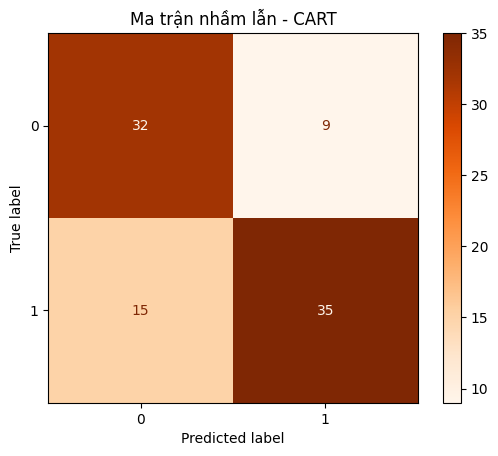

Độ chính xác trên tập kiểm thử (CART): 0.7363


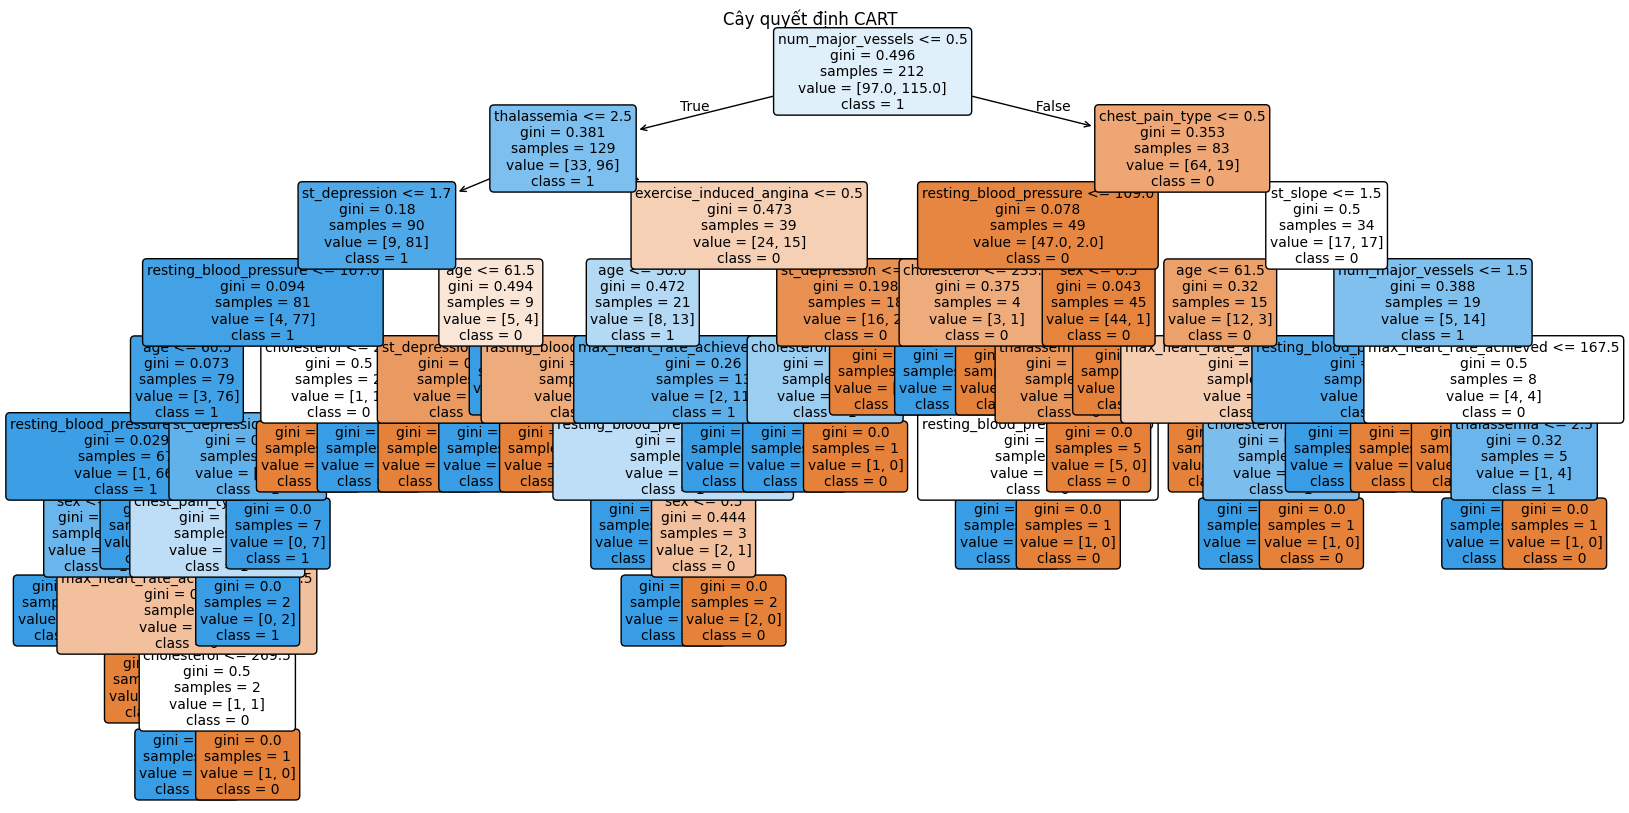

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Khởi tạo cây CART
cart_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Huấn luyện trên tập huấn luyện
cart_tree.fit(X_train, y_train)
# Dự đoán trên tập kiểm thử
y_pred_cart = cart_tree.predict(X_test)

# Tính ma trận nhầm lẫn
cm_cart = confusion_matrix(y_test, y_pred_cart)
print("Trần Quân Bảo - 6351071005")
# Hiển thị ma trận nhầm lẫn
disp_cart = ConfusionMatrixDisplay(confusion_matrix=cm_cart, display_labels=cart_tree.classes_)
disp_cart.plot(cmap=plt.cm.Oranges)
plt.title("Ma trận nhầm lẫn - CART")
plt.show()

# Tính độ chính xác
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print("Độ chính xác trên tập kiểm thử (CART):", round(accuracy_cart, 4))
plt.figure(figsize=(20,10))
plot_tree(
    cart_tree,
    feature_names=X_encoded.columns,
    class_names=[str(cls) for cls in cart_tree.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Cây quyết định CART")
plt.show()


Trần Quân Bảo - 6351071005


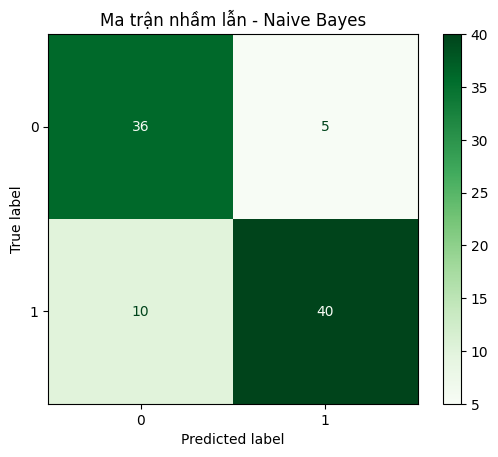

Độ chính xác trên tập kiểm thử (Naive Bayes): 0.8352


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Khởi tạo mô hình Gaussian Naive Bayes
nb_model = GaussianNB()

# Huấn luyện trên tập huấn luyện
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Trần Quân Bảo - 6351071005")
# Ma trận nhầm lẫn
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot(cmap=plt.cm.Greens)
plt.title("Ma trận nhầm lẫn - Naive Bayes")
plt.show()

# Độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Độ chính xác trên tập kiểm thử (Naive Bayes):", round(accuracy_nb, 4))


Naïve Bayes đạt độ chính xác cao nhất (0.8352) trên tập kiểm thử, tốt hơn hẳn so với hai mô hình cây quyết định.

CART xếp thứ hai với độ chính xác 0.7363.

ID3 có độ chính xác thấp nhất trong ba mô hình, 0.6923.